# U.S. Wealth and Income

In [101]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datapackage import Package
from tableschema import Storage

from swf.datapackage import load


In [114]:
def get_distribution(df, column, quantiles=100):
    real_column = 'real_{}'.format(column)
    real_column_pct = 'real_{}_pct'.format(column)
    
    pdf = df[[column, 'wgt']].copy()
    pdf[real_column] = pdf[column] * pdf['wgt']
    pdf[real_column_pct] = (pdf[real_column] / pdf[real_column].sum() * 100)
    pdf.sort_values(column, inplace=True)

    pdf['population_pct'] = (pdf.wgt.cumsum() / pdf.wgt.sum() * 100)
    pdf['quantile'] = pd.cut(pdf['population_pct'].values, quantiles, labels=False) + 1
    pdf = pdf.groupby('quantile')[[real_column_pct]].sum()
    
    return pdf
    

In [103]:
# Load the survey data
descriptor = 'http://datahub.io/quidproquo/2016-survey-of-consumer-finances-summary-extract/datapackage.json'
df = load(descriptor)
df.set_index('Y1', inplace=True)
df.drop([df.columns[0]], axis=1, inplace=True)
print(len(df))
display(df.head())

31240


,YY1,wgt,hhsex,age,agecl,educ,edcl,married,kids,lf,...,LLOAN11,LLOAN12,nwcat,inccat,assetcat,ninccat,NINC2CAT,nwpctlecat,incpctlecat,nincpctlecat
Y1,,,,,,,,,,,,,,,,,,,,,
11,1,6427.136676,2,71,5,10,3,2,0,0,...,0,0,3,1,3,1,1,7,1,1
12,1,6428.350592,2,71,5,10,3,2,0,0,...,0,0,3,1,3,1,1,7,1,1
13,1,6414.477294,2,71,5,10,3,2,0,0,...,0,0,3,1,3,1,1,7,1,1
14,1,6428.487972,2,71,5,10,3,2,0,0,...,0,0,3,1,3,1,1,7,1,1
15,1,6425.256822,2,71,5,10,3,2,0,0,...,0,0,3,1,3,1,1,7,1,1


## U.S. Income Distribution

In [106]:
ipdf = get_distribution(df, 'income')
display(ipdf.tail())

,real_income_pct
quantile,
96,2.804532
97,3.263355
98,4.000630
99,6.139643
100,23.373569


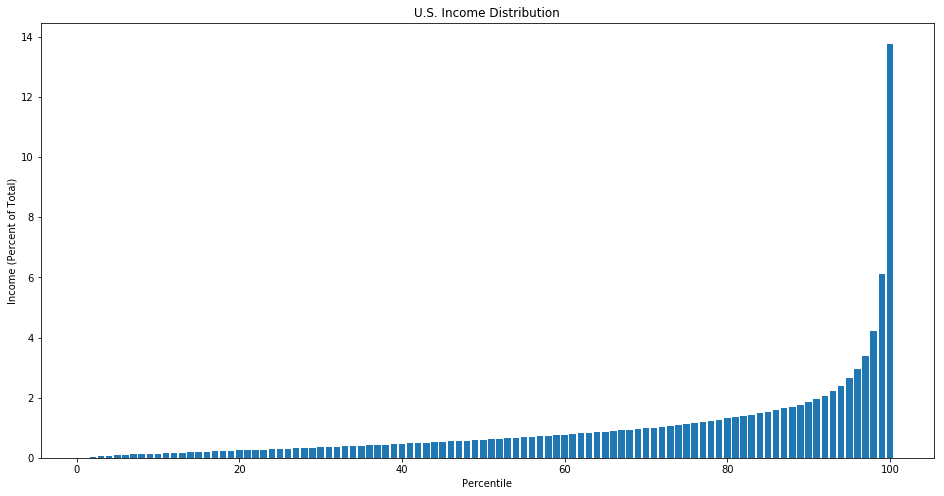

In [107]:
bins = np.linspace(1, 100, 100)

plt.figure(figsize=(16,8))
plt.bar(ipdf.index, idf['real_income_pct'])
plt.title("U.S. Income Distribution")
plt.xlabel("Percentile")
plt.ylabel("Income (Percent of Total)")
plt.show()

# U.S. Wealth Distribution

In [110]:
wpdf = get_distribution(df, 'networth')
display(wpdf.tail())


,real_networth_pct
quantile,
96,3.741925
97,4.650510
98,6.724065
99,11.437424
100,38.563787


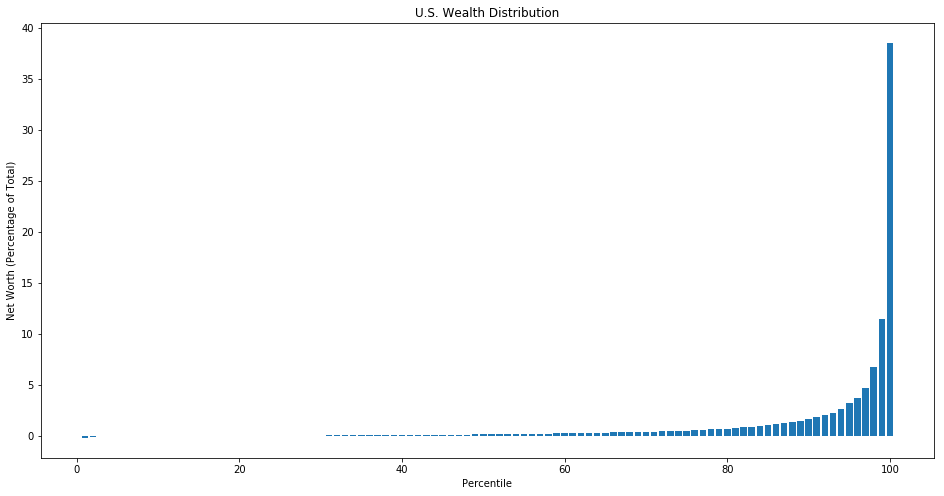

In [111]:
bins = np.linspace(1, 100, 100)

plt.figure(figsize=(16,8))
plt.bar(wpdf.index, wpdf['real_networth_pct'])
plt.title("U.S. Wealth Distribution")
plt.xlabel("Percentile")
plt.ylabel("Net Worth (Percentage of Total)")
plt.show()

In [116]:
wpdf2 = get_distribution(df, 'networth', quantiles=[0, 50, 75, 85, 90, 95, 99, 100])
display(wpdf2)

,real_networth_pct
quantile,
1.0,1.188170
2.0,7.398664
3.0,7.540209
4.0,6.795619
5.0,11.959626
6.0,26.553925
7.0,38.558681
